<a href="https://colab.research.google.com/github/shreyanshz04b/cothon-solutions/blob/main/animalprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [2]:
model = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [10]:
def load_and_preprocess_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array, img

In [12]:
def predict_animal(url):
    img_array, img = load_and_preprocess_image(url)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=1)[0]
    return decoded_predictions, img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


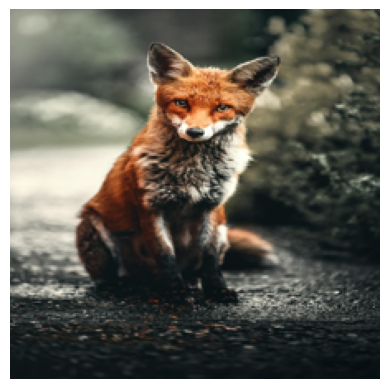

In [16]:
url = 'https://images.pexels.com/photos/2295744/pexels-photo-2295744.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2'
predictions, img = predict_animal(url)
plt.imshow(img)
plt.axis('off')
plt.show()


In [17]:
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1: red_fox (0.94)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


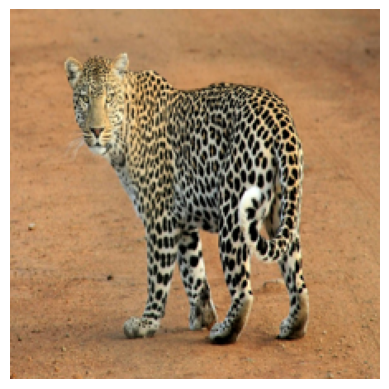

In [18]:
url = 'https://images.pexels.com/photos/39857/leopard-leopard-spots-animal-wild-39857.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2'
predictions, img = predict_animal(url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1: leopard (0.89)
